# Evaluate Exercises
***

1. Load the tips dataset from either pydataset or seaborn.

In [1]:
import pandas as pd
import numpy as np

from pydataset import data

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2.  Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Here is some sample code to get you started:

- from sklearn.linear_model import LinearRegression

-  assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
   - Modify and add to the code above as necessary for it to work with the tips dataset.

In [4]:
X = df['total_bill']
y = df['tip']

df['yhat_baseline'] = df['tip'].mean()

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [6]:
from sklearn.linear_model import LinearRegression

# generate parameters, i.e. create model
ols_model = LinearRegression().fit(df[['total_bill']], df[['tip']])

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df[['total_bill']])


In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


3. Plot the residuals for the linear regression model that you made.

In [8]:
# residual = actual - predicted
df['residual'] = y - df.yhat
df['baseline_residual'] = y - df.yhat_baseline

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


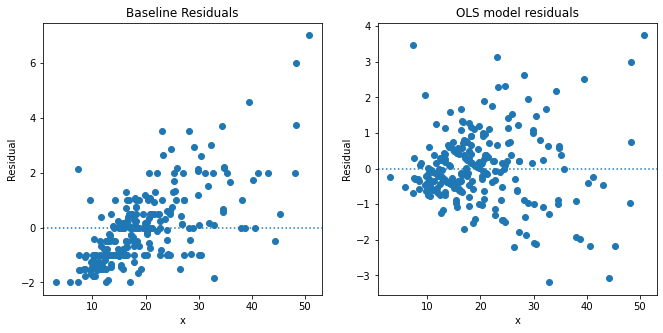

In [10]:
# residual plots (x vs residual)
import matplotlib.pyplot as plt

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(X, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(X, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

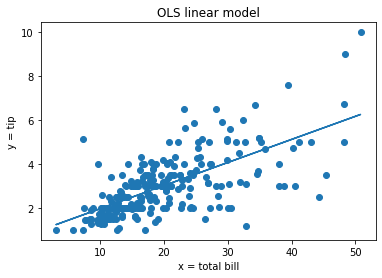

In [11]:
# visualize the line of best fit from OLS linear model
plt.scatter(X, y)
plt.plot(X, df.yhat)
plt.xlabel('x = total bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

#### SSE (Sum of Squared Errors)

In [12]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [13]:
SSE = df['residual^2'].sum()
print('SSE =', "{:.1f}".format(SSE))

SSE = 252.8


#### TSS (Total Sum of Squares)

In [14]:
# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   df['baseline_residual^2'].sum()
print("TSS = ","{:.1f}".format(TSS))

TSS =  465.2


#### ESS (Explained Sum of Squares)

In [15]:
# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE
print("ESS = ","{:.1f}".format(ESS))

ESS =  212.4


#### MSE (Mean Squared Error)

In [16]:
len(df)
df.shape[0]

244

In [17]:
MSE = SSE/len(df)

print("MSE = ", "{:.1f}".format(MSE))

MSE =  1.0


#### RMSE (Root Mean Squared Error)

In [18]:
from math import sqrt
RMSE = sqrt(MSE)

print("RMSE = ", "{:.1f}".format(RMSE))

RMSE =  1.0


#5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [19]:
SSE_baseline = df['baseline_residual^2'].sum()
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE Baseline = 465.2


In [20]:
MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE baseline =  1.9


In [21]:
RMSE_baseline = RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE baseline =  1.4


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [22]:
SSE_baseline - SSE

212.4237331984044

7. What is the amount of variance explained in your model?

In [23]:
# Calculate R2 (Variance explained in model)
R2 = ESS/TSS
R2

0.45661658635167646

8. Is your model better than the baseline model?

In [24]:
#Yes, the model is better than the baseline!

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [25]:
#Created evaluate.py in regressions_exercises directory with functions indicated above

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [26]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
X = mpg['displ']
y = mpg['hwy']

mpg['yhat_baseline'] = mpg['hwy'].mean()

In [28]:
from sklearn.linear_model import LinearRegression

# generate parameters, i.e. create model
ols_model = LinearRegression().fit(mpg[['displ']], mpg[['hwy']])

# compute predictions and add to original dataframe
mpg['yhat'] = ols_model.predict(mpg[['displ']])

In [29]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat_baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002


In [30]:
import evaluate

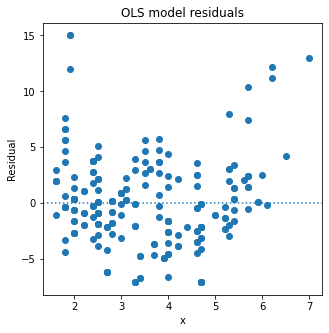

In [31]:
evaluate.plot_residuals(X, y, mpg['yhat'])

In [32]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(y, mpg['yhat']) 
SSE, ESS, TSS, MSE, RMSE

SSE = 3413.8
TSS =  8261.7
ESS =  4847.8
MSE =  14.6
RMSE =  3.8


(3413.829008995467,
 4847.833384166924,
 8261.66239316239,
 14.589012858954987,
 3.8195566312014524)

In [33]:
SSE_baseline, ESS_baseline, TSS_baseline, MSE_baseline, RMSE_baseline = evaluate.baseline_mean_errors(y)
SSE_baseline, ESS_baseline, TSS_baseline, MSE_baseline, RMSE_baseline

SSE_baseline = 8261.7
TSS_baseline =  8261.7
ESS_baseline =  0.0
MSE_baseline =  35.3
RMSE_baseline =  5.9


(8261.66239316239, 0.0, 8261.66239316239, 35.30624954342902, 5.941906221359356)

In [35]:
is_better_than_baseline = evaluate.better_than_baseline(y, mpg['yhat'])
print("Is our prediction better than the baseline?: ",is_better_than_baseline)

SSE = 3413.8
SSE_baseline = 8261.7
Is our prediction better than the baseline?:  True
